In [1]:
import os
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

import tensorflow as tf
import cv2
import numpy as np
import importlib
import matplotlib.pylab as plt

from estimation.config import get_default_configuration
from estimation.coordinates import get_coordinates
from estimation.connections import get_connections
from estimation.estimators import estimate
from estimation.renderers import draw

from train_singlenet_mobilenetv3 import register_tf_netbuilder_extensions

image = "resources/ski_224.jpg"
output_image = "demo.png"
create_model_fn = "create_openpose_singlenet"
weights_path = "output_singlenet/0629_epoch300/openpose_singlenet"
paf_idx = 2
heatmap_idx = 3

In [2]:
if __name__ == '__main__':
    register_tf_netbuilder_extensions()

    module = importlib.import_module('models')
    create_model = getattr(module, create_model_fn)
    model = create_model()
    model.load_weights(weights_path)

In [3]:
    img = cv2.imread(image)  # B,G,R order
    input_img = img[np.newaxis, :, :, [2, 1, 0]]
    inputs = tf.convert_to_tensor(input_img)

    outputs = model.predict(inputs)
    pafs = outputs[paf_idx][0, ...]
    heatmaps = outputs[heatmap_idx][0, ...]
    
    print("inputs: {}, shape: {}\n".format(type(inputs), inputs.shape))
    print("outputs: {}, len: {}\n".format(type(outputs), len(outputs)))
    print("heatmaps: {}, shape: {}, len: {}\n".format(type(heatmaps), heatmaps.shape, len(heatmaps)))
    print("pafs: {}, shape: {}, len: {}\n".format(type(pafs), pafs.shape, len(pafs)))

inputs: <class 'tensorflow.python.framework.ops.EagerTensor'>, shape: (1, 224, 224, 3)

outputs: <class 'tuple'>, len: 4

heatmaps: <class 'numpy.ndarray'>, shape: (28, 28, 19), len: 28

pafs: <class 'numpy.ndarray'>, shape: (28, 28, 38), len: 28



In [5]:
    print("outputs: {}".format(outputs))

outputs: (array([[[[ 1.26961808e-04,  2.29092920e-03, -2.77725644e-06, ...,
           6.74244584e-05,  9.94893126e-05, -9.83647624e-05],
         [ 6.89532899e-04,  4.19183867e-03,  8.69930605e-04, ...,
          -4.64133424e-04,  2.69820564e-04, -4.77276371e-05],
         [-8.15884778e-05,  1.25360861e-03,  2.40888607e-04, ...,
           1.10002526e-04,  6.43178719e-05, -1.10978472e-04],
         ...,
         [-5.28338552e-03, -1.08576771e-02, -6.90751197e-03, ...,
          -7.58841867e-04,  3.03320913e-03,  2.78894627e-03],
         [ 1.46210613e-03, -1.05910702e-03, -4.55230521e-03, ...,
           1.24541507e-03,  4.66103927e-04,  8.74612189e-04],
         [ 2.54613417e-03,  2.54153507e-03, -3.38226696e-03, ...,
           1.41641591e-04, -1.94243315e-04,  7.42207165e-04]],

        [[ 5.07823948e-04,  5.55789506e-04,  6.51044014e-04, ...,
           1.48844396e-04, -1.40816293e-04, -2.00611576e-05],
         [ 2.58315966e-04,  5.44178067e-03,  6.70138281e-04, ...,
           1

In [14]:
    print("heatmaps:\n\n{}\n\n".format(heatmaps))
    print("pafs:\n\n{}\n\n".format(pafs))

heatmaps:

[[[ 4.6256854e-04  3.2025500e-04  2.0959917e-03 ...  9.1223133e-04
    8.2685880e-04  9.8462886e-01]
  [ 7.5220119e-04  5.5279088e-04  1.2260649e-03 ...  5.6204497e-04
   -3.6126561e-04  9.8865265e-01]
  [ 8.8467976e-05 -6.9678546e-04 -5.0021871e-04 ...  2.1252983e-04
   -3.7753335e-04  9.9474066e-01]
  ...
  [ 3.9118182e-02 -2.5040521e-03  3.2817824e-03 ...  9.6516032e-03
    4.5371912e-02  8.7941200e-01]
  [ 7.3111164e-03 -1.0030925e-03 -3.5195376e-04 ...  5.7071180e-04
    2.3095531e-02  9.5402616e-01]
  [ 1.3322160e-03  2.3492523e-03  7.0126518e-03 ...  7.8220321e-03
    1.5640990e-03  9.7878337e-01]]

 [[ 2.3241066e-03  1.1734713e-03  2.6999859e-03 ...  1.7934390e-03
    3.9825444e-03  9.7455847e-01]
  [ 7.8107481e-04 -1.1159607e-04  7.2801980e-04 ...  1.4560086e-04
    3.6998990e-04  9.8450619e-01]
  [-9.8059121e-05  5.1774876e-04  1.0981960e-03 ...  2.1401067e-04
    1.6282305e-04  9.8973089e-01]
  ...
  [ 4.0718067e-01  3.7135796e-03  3.9662230e-03 ...  1.3914350e-01

In [31]:
    print("heatmaps[0,0,:]:\n\n{}\n\n".format(heatmaps[0,0,:]))
    print("pafs[0,0,:]:\n\n{}\n\n".format(pafs[0,0,:]))

heatmaps[0,0,:]:

[ 4.6256854e-04  3.2025500e-04  2.0959917e-03  8.3401904e-04
  3.7979541e-04  1.1778653e-03  1.3355328e-03 -1.8660781e-04
  3.4669798e-03  1.2590481e-03  4.2839136e-04  2.3757946e-03
  1.1125811e-03  2.3204803e-04  1.6244644e-03  1.1397167e-03
  9.1223133e-04  8.2685880e-04  9.8462886e-01]


pafs[0,0,:]:

[ 4.7842457e-04  4.8219820e-04  2.0230759e-03  1.8416919e-03
  1.6380430e-03  2.7657642e-03 -3.1940540e-04  2.7312918e-04
  6.9465931e-04  1.9544819e-03  1.3109543e-03  1.1937089e-03
 -4.4489253e-04  5.3711282e-04  3.7059208e-04 -5.7278847e-04
  1.0221828e-03  1.4948443e-03 -6.0708483e-04  3.0615978e-04
  1.5060227e-04 -3.0099895e-05  4.7025978e-04 -2.0512010e-03
 -1.4748896e-05  5.1810150e-04 -8.1956893e-04  2.5332239e-04
 -4.4747884e-04  2.2358338e-04 -4.3219468e-04 -2.4586273e-04
  1.8386098e-04 -8.3162030e-04  7.3222921e-04  3.1357972e-04
  6.5718999e-04  4.5757470e-04]




In [10]:
    np.save('heatmaps', heatmaps)
    np.save('pafs', pafs)

In [7]:
    cfg = get_default_configuration()

    coordinates = get_coordinates(cfg, heatmaps)
    print("coordinates: {}, len: {}\n\n".format(type(coordinates), len(coordinates)))
    for i, (k, v) in enumerate(coordinates.items(), 0):
        print("[{}] {}: {} \n".format(i, k, v)) 

coordinates: <class 'dict'>, len: 18


[0] nose: [(25, 2, 0.5077291, 0), (19, 3, 0.4380543, 1), (2, 11, 0.5291301, 2), (6, 11, 0.7784898, 3)] 

[1] neck: [(25, 3, 0.78210205, 4), (18, 5, 0.5933922, 5), (2, 12, 0.5145338, 6), (6, 12, 0.85700995, 7)] 

[2] right_shoulder: [(23, 3, 0.5754127, 8), (17, 5, 0.43502888, 9), (1, 12, 0.6134121, 10), (5, 12, 0.76531065, 11)] 

[3] right_elbow: [(22, 5, 0.81888145, 12), (15, 6, 0.1657728, 13), (1, 13, 0.3357881, 14), (5, 15, 0.5026108, 15)] 

[4] right_wrist: [(23, 7, 0.65072644, 16), (19, 8, 0.1346563, 17), (11, 10, 0.20493338, 18), (2, 13, 0.44801405, 19), (5, 15, 0.31532845, 20), (8, 15, 0.10285651, 21)] 

[5] left_shoulder: [(26, 3, 0.7990657, 22), (20, 5, 0.3789928, 23), (3, 12, 0.39963746, 24), (7, 12, 0.64936656, 25)] 

[6] left_elbow: [(27, 5, 0.5127434, 26), (14, 6, 0.11082054, 27), (21, 6, 0.2655652, 28), (3, 13, 0.29810765, 29), (8, 14, 0.42156744, 30)] 

[7] left_wrist: [(26, 5, 0.35721964, 31), (27, 7, 0.13158625, 32), (22, 8, 0.1016

In [13]:
    print(type(coordinates))
    print(pafs.shape)

<class 'dict'>
(28, 28, 38)


In [14]:
    connections = get_connections(cfg, coordinates, pafs)
    print("connections: {}, len: {}\n\n{}".format(type(connections), len(connections), connections))

connections: <class 'list'>, len: 19

[array([[ 4.        ,  8.        ,  0.78209788,  0.57542264,  0.6863216 ],
       [ 7.        , 11.        ,  0.85698926,  0.76532686,  0.55661687],
       [ 6.        , 10.        ,  0.51452184,  0.61342323,  0.53836493],
       [ 5.        ,  9.        ,  0.59323561,  0.43498465,  0.48115081]]), array([[ 4.        , 22.        ,  0.78209788,  0.79909635,  0.83743015],
       [ 7.        , 25.        ,  0.85698926,  0.64938134,  0.58481494],
       [ 6.        , 24.        ,  0.51452184,  0.39970294,  0.48407756],
       [ 5.        , 23.        ,  0.59323561,  0.37876827,  0.47463131]]), array([[11.        , 15.        ,  0.76532686,  0.50272793,  0.8014209 ],
       [10.        , 14.        ,  0.61342323,  0.33574986,  0.66738933],
       [ 8.        , 12.        ,  0.57542264,  0.81885588,  0.48703308],
       [ 9.        , 13.        ,  0.43498465,  0.16538446,  0.25409975]]), array([[12.        , 16.        ,  0.81885588,  0.65083724,  0.7549

In [7]:
    skeletons = estimate(cfg, connections)
    print("skeletons: {}, shape: {}, len: {}\n\n {}".format(type(skeletons), skeletons.shape, len(skeletons), skeletons))

skeletons: <class 'numpy.ndarray'>, shape: (4, 20), len: 4

 [[ 0.          4.          8.         12.         16.         22.
  26.         31.         36.         42.         48.         53.
  60.         66.         72.         76.         80.         84.
  23.46303791 18.        ]
 [ 3.          7.         11.         15.         -1.         25.
  30.         35.         41.         -1.         -1.         59.
  63.         -1.         75.         79.         83.         86.
  19.28679031 14.        ]
 [ 2.          6.         10.         14.         20.         24.
  29.         -1.         39.         -1.         -1.         57.
  -1.         -1.         74.         -1.         82.         85.
  11.81278458 13.        ]
 [ 1.          5.          9.         13.         -1.         23.
  28.         -1.         38.         45.         52.         55.
  64.         71.         73.         -1.         81.         -1.
  12.83963221 16.        ]]


In [8]:
    output = draw(cfg, img, coordinates, skeletons, resize_fac=8)
    print("output: {}, shape: {}, len: {}\n\n {}".format(type(output), output.shape, len(output), output))

output: <class 'numpy.ndarray'>, shape: (224, 224, 3), len: 224

 [[[ 12  13   9]
  [ 20  22  16]
  [ 20  22  16]
  ...
  [ 17  23  22]
  [ 17  23  22]
  [ 18  23  22]]

 [[ 11  12   8]
  [ 19  21  15]
  [ 17  21  15]
  ...
  [ 21  26  25]
  [ 21  26  25]
  [ 20  25  24]]

 [[ 10  11   7]
  [ 17  19  13]
  [ 23  25  19]
  ...
  [ 23  28  27]
  [ 23  28  27]
  [ 23  28  27]]

 ...

 [[159 172 170]
  [160 173 171]
  [159 172 170]
  ...
  [158 172 170]
  [152 170 169]
  [157 171 170]]

 [[159 172 170]
  [158 171 169]
  [157 170 168]
  ...
  [154 168 167]
  [153 167 166]
  [154 166 166]]

 [[159 172 170]
  [157 170 168]
  [158 171 169]
  ...
  [153 167 166]
  [154 166 166]
  [152 166 165]]]


Output saved: demo.png


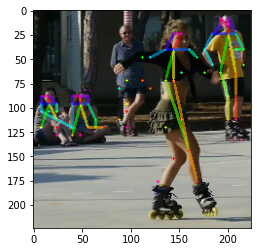

In [9]:
    cv2.imwrite(output_image, output)
    plt.plt.imshow(output[:,:,[2,1,0]])
    print(f"Output saved: {output_image}")